In [2]:
import os
import glob
import numpy as np
LABELS=["sit on bed", " sit on chair", "lying", "ambulating"]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
class data_ana:
    def __init__(self, data_path):
        self.data_path  = data_path
    def whole_data(self):
        s1_dataset = glob.glob(self.data_path+'\S1_Dataset'+'/*')
        s2_dataset = glob.glob(self.data_path+'\S2_Dataset'+'/*')
        li_1 = []
        li_2 = []
        for file in s1_dataset:
            if file.endswith('.txt'):
                continue
            df = pd.read_csv(file, header = None, index_col = None)
            li_1.append(df)
        for file2 in s2_dataset:
            if file2.endswith('.txt'):
                continue
            df2 = pd.read_csv(file2, header = None, index_col = None)
            li_2.append(df2)
        df1 = pd.concat(li_1, axis=0, ignore_index=True)
        df2 = pd.concat(li_2, axis=0, ignore_index=True)
        data = pd.concat((df1,df2),axis=0,ignore_index=True)
        data.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
        return data
    def female_data(self):
        s1_female = glob.glob(self.data_path+'\S1_Dataset'+'\*')
        s2_female = glob.glob(self.data_path+'\S2_Dataset'+'\*')
        female1 = []
        female2 = []
        for female in s1_female:
            if female.endswith('F'):
                df = pd.read_csv(female, header = None, index_col = None)
                female1.append(df)
        for female in s2_female:
            if female.endswith('F'):
                df = pd.read_csv(female, header = None, index_col = None)
                female2.append(df)
        fs_1 = pd.concat(female1, axis=0, ignore_index=True)
        fs_1.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
        fs_2 = pd.concat(female2, axis=0, ignore_index=True)
        fs_2.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
        whole_female = pd.concat((fs_1, fs_2))
        return fs_1, fs_2, whole_female
    def male_data(self):
        
        s1_male = glob.glob(self.data_path+'\S1_Dataset'+'\*')
        s2_male = glob.glob(self.data_path+'\S2_Dataset'+'\*')
        male1 = []
        male2 = []
        for male in s1_male:
             if male.endswith('M'):
                df = pd.read_csv(male, header = None, index_col = None)
                male1.append(df)
        for male in s2_male:
             if male.endswith('M'):
                df = pd.read_csv(male, header = None, index_col = None)
                male2.append(df)
        ms_1 = pd.concat(male1, axis=0, ignore_index=True)
        ms_1.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
        ms_2 = pd.concat(male2, axis=0, ignore_index=True)
        ms_2.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
        whole_male = pd.concat((ms_1, ms_2))
        return ms_1, ms_2, whole_male
        
    
        
    def data_analysis(self):
        a = self.whole_data()
        print("This is information of the Data")
        a.info()
        print()
        print()
        print("This is The description of all the numerical column of  the data")
        print(a.describe())
        print()
        print()
        print("Checking if there is any Null values")
        print(a.isnull().sum())
        print("As We can see there is no any null values.\nWe check for Duplicate values")
        c = a.duplicated().sum()
        if a.duplicated().sum()>=1:
            print(c, "Duplicate values.")
            print("removing Duplicates.....")
            a = a.drop_duplicates()
            print("Duplicat values are removed")
            
        else:
            print("There is no duplicates")
        
        return 
    def clean_data(self):
        clean  = self.whole_data()
        clean = clean.drop_duplicates()
        return clean
    def imbalance_checker(self):
        data = self.clean_data()
        count_class = pd.value_counts(data['Activity Label'], sort=True)
        count_class.plot(kind=  'bar')
        plt.title("Activity Label Distribution")
        plt.xticks(range(4),LABELS)
        plt.xlabel('Activity Label')
        plt.ylabel('Frequence')
        plt.show()
    def balance_data_oversampling(self):
        x, y= self.x_y_data()
        smk = SMOTETomek(random_state =42)
        x_res_up , y_res_up = smk.fit_resample(x,y)
        return x_res_up, y_res_up
    def balance_checker_a_b(self):
        x_bal, y_bal = self.balance_data_oversampling()
        count_class = pd.value_counts(y_bal, sort = True)
        count_class.plot(kind= 'bar')
        plt.title('Activity Label Distribution')
        plt.xticks(range(4),LABELS)
        plt.xlabel('Activity Label')
        plt.ylabel('Frequency')
        plt.show()
    def standard_scaling_feature(self):
        x,y = self.balance_data_oversampling()
        sc = StandardScaler()
        x = sc.fit_transform(x)
        return x,y
    def x_y_data(self):
        data = self.clean_data()
        x = data.iloc[:, :-1]
        y = data.iloc[:, -1]
        return x,y
    def st_df(self):
        x,y = self.standard_scaling_feature()
        x = pd.DataFrame(x, columns=['Time','Acc. Front','Acc. vert','Acc. Lat', 'id','RSSI','Freq','Phase'])
        #x.drop(columns=['id'],inplace=True)
        y = pd.DataFrame(y, columns= ['Activity Label'])
        return x, y

    def split_data(self):
        x, y = st_df()
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 42)
        return x_train, x_test, y_train, y_test
        
        

        
        
        
        

In [3]:
a = data_ana(r'C:\Users\Sanjeev\ineuron\Projects\Old People')


In [26]:
smk = SMOTETomek(random_state =42)
x_res_up , y_res_up = smk.fit_resample(x,y)

In [32]:
ls

 Volume in drive C is OS
 Volume Serial Number is B8FD-3B7C

 Directory of C:\Users\Sanjeev\ineuron\Projects\Old People

14-10-2021  13:14    <DIR>          .
14-10-2021  13:14    <DIR>          ..
12-10-2021  14:49    <DIR>          .ipynb_checkpoints
12-10-2021  21:45             2,801 app.py
13-10-2021  08:47        30,209,271 combined.csv
12-10-2021  12:30         4,699,050 combined_data.csv
13-10-2021  08:49        28,879,640 combined1.csv
13-10-2021  08:53        33,007,864 data_w_i.csv
10-10-2021  18:31           654,610 Datasets_Healthy_Older_People.zip
13-10-2021  09:02        17,171,337 full_data.csv
12-10-2021  10:58             1,007 logistic_b.pkl
14-10-2021  07:12             1,965 main.py
14-10-2021  08:21           180,355 older_people.ipynb
13-10-2021  10:28         4,259,514 raw_dio.csv
12-12-2016  12:41    <DIR>          S1_Dataset
12-12-2016  12:41    <DIR>          S2_Dataset
12-10-2021  13:48    <DIR>          static
12-10-2021  15:09               515 StockPriceV

In [33]:
df = pd.read_csv('raw_dio.csv')
df.head()

,Time,Acc. Front,Acc. vert,Acc. Lat,id,RSSI,Phase,Freq,Activity Label
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1


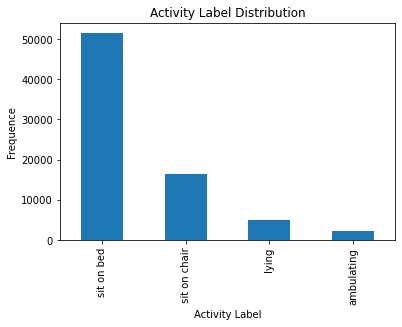

In [34]:
count_class = pd.value_counts(df['Activity Label'], sort=True)
count_class.plot(kind=  'bar')
plt.title("Activity Label Distribution")
plt.xticks(range(4),LABELS)
plt.xlabel('Activity Label')
plt.ylabel('Frequence')
plt.show()

In [26]:
smk = SMOTETomek(random_state =42)
x_res_up , y_res_up = smk.fit_resample(x,y)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75128 entries, 0 to 75127
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            75128 non-null  float64
 1   Acc. Front      75128 non-null  float64
 2   Acc. vert       75128 non-null  float64
 3   Acc. Lat        75128 non-null  float64
 4   id              75128 non-null  int64  
 5   RSSI            75128 non-null  float64
 6   Phase           75128 non-null  float64
 7   Freq            75128 non-null  float64
 8   Activity Label  75128 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 5.2 MB


In [36]:
# Remove outliers by IQR

In [37]:
def remove_by_iqr(feature):
    data= sorted(feature)
    data = pd.DataFrame(data)
    quantile1, quantile3= np.percentile(data,[25,75])
    iqr_value=quantile3-quantile1
    
    upper=  np.where(data>=(quantile3+1.5*iqr_value))
    lower = np.where(data<=(quantile3-1.5*iqr_value))
    data.drop(upper[0],inplace=True,axis=0)
    data.drop(lower[0],inplace=True,axis=0)
    return data


In [38]:
time = remove_by_iqr(df['Time'])
front = remove_by_iqr(df['Acc. Front'])
vert = remove_by_iqr(df['Acc. vert'])
lat = remove_by_iqr(df['Acc. Lat'])
rssi = remove_by_iqr(df.RSSI)
phase = remove_by_iqr(df.Phase)
Freq = remove_by_iqr(df.Freq)

In [39]:
new_df2 = pd.DataFrame()
new_df2['Time'] = time
new_df2['Acc. Front'] = front
new_df2['Acc. vert'] = vert
new_df2['Acc. Lat']  = lat
new_df2['id']  = df.id
new_df2['RSSI'] = rssi
new_df2['Phase'] = phase
new_df2['Freq'] = Freq
new_df2['Activity Label'] = df['Activity Label']

In [40]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72488 entries, 0 to 72487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            72488 non-null  float64
 1   Acc. Front      71667 non-null  float64
 2   Acc. vert       72438 non-null  float64
 3   Acc. Lat        55315 non-null  float64
 4   id              72488 non-null  int64  
 5   RSSI            64135 non-null  float64
 6   Phase           72488 non-null  float64
 7   Freq            72488 non-null  float64
 8   Activity Label  72488 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 7.5 MB


In [41]:
time = new_df2.Time.iloc[:145710]
front = new_df2['Acc. Front'].iloc[:145710]
vert = new_df2['Acc. vert'].iloc[:145710]
lat = new_df2['Acc. Lat'].iloc[:145710]
idd = new_df2['id'].iloc[:145710]
rssi = new_df2['RSSI'].iloc[:145710]
phase = new_df2['Phase'].iloc[:145710]
freq = new_df2['Freq'].iloc[:145710]
acti = new_df2['Activity Label'].iloc[:145710]

In [42]:
new_df3 = pd.DataFrame()
new_df3['Time'] = time
new_df3['Acc. Front'] = front
new_df3['Acc. vert'] = vert
new_df3['Acc. Lat'] = lat
new_df3['id'] = idd
new_df3['RSSI'] = rssi
new_df3['Phase'] = phase
new_df3['Freq'] = freq
new_df3['Activity Label'] = acti

In [43]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72488 entries, 0 to 72487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            72488 non-null  float64
 1   Acc. Front      71667 non-null  float64
 2   Acc. vert       72438 non-null  float64
 3   Acc. Lat        55315 non-null  float64
 4   id              72488 non-null  int64  
 5   RSSI            64135 non-null  float64
 6   Phase           72488 non-null  float64
 7   Freq            72488 non-null  float64
 8   Activity Label  72488 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 5.5 MB


In [44]:
new_df3.dropna(axis=0,inplace=True)

In [45]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 17173 to 72487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            55315 non-null  float64
 1   Acc. Front      55315 non-null  float64
 2   Acc. vert       55315 non-null  float64
 3   Acc. Lat        55315 non-null  float64
 4   id              55315 non-null  int64  
 5   RSSI            55315 non-null  float64
 6   Phase           55315 non-null  float64
 7   Freq            55315 non-null  float64
 8   Activity Label  55315 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 4.2 MB


In [46]:
x,y = new_df3.iloc[:, :-1], new_df3.iloc[:, -1]

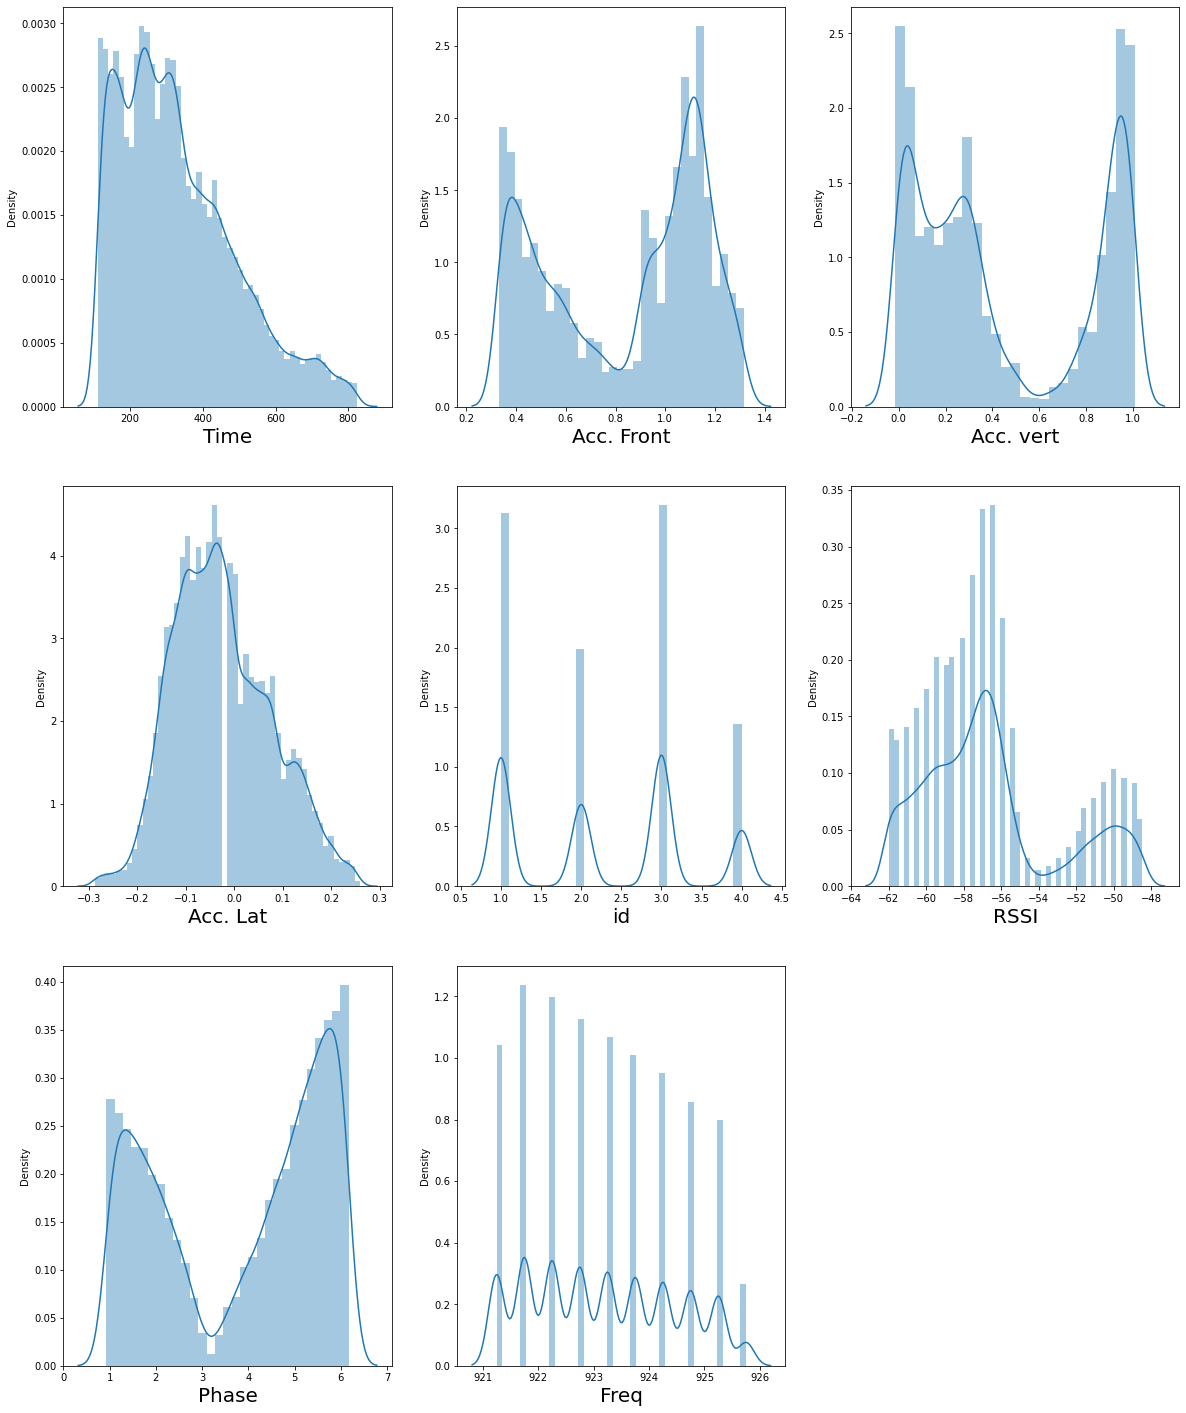

In [47]:
import warnings
warnings.filterwarnings('ignore')
# Let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25),facecolor= 'white')
plotnumber = 1
for column in x:
    if plotnumber <=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Time'>

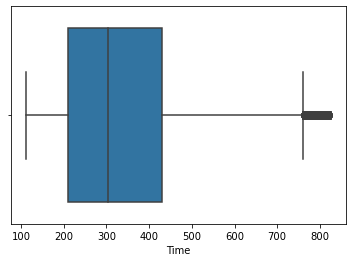

In [48]:
sns.boxplot(new_df3.Time)

<AxesSubplot:xlabel='Acc. vert'>

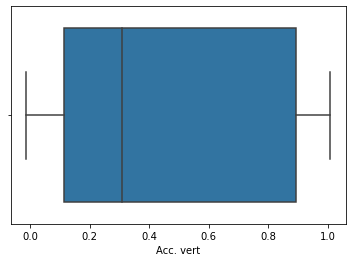

In [49]:
sns.boxplot(new_df3['Acc. vert'])

<AxesSubplot:xlabel='Acc. Front'>

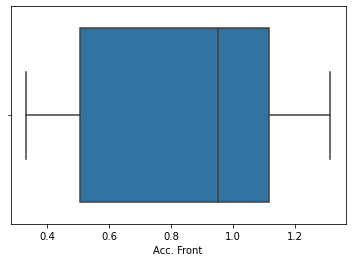

In [50]:
sns.boxplot(new_df3['Acc. Front'])

<AxesSubplot:xlabel='Acc. Lat'>

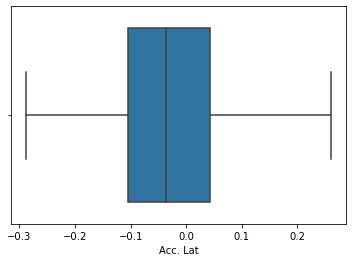

In [51]:
sns.boxplot(new_df3['Acc. Lat'])

<AxesSubplot:xlabel='Phase'>

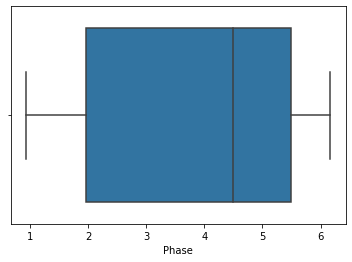

In [52]:
sns.boxplot(new_df3['Phase'])

<AxesSubplot:xlabel='Freq'>

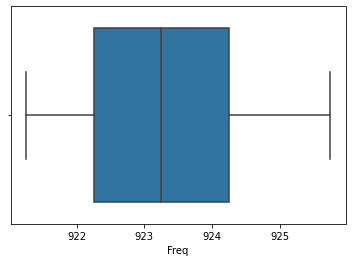

In [53]:
sns.boxplot(new_df3['Freq'])

<AxesSubplot:xlabel='RSSI'>

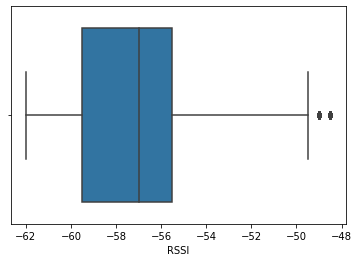

In [54]:
sns.boxplot(new_df3['RSSI'])

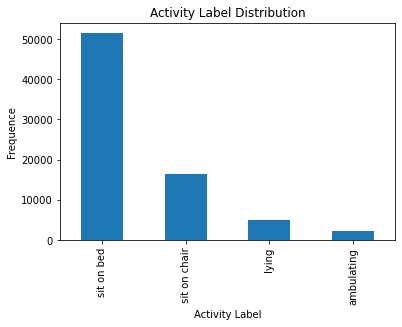

In [55]:
count_class = pd.value_counts(df['Activity Label'], sort=True)
count_class.plot(kind=  'bar')
plt.title("Activity Label Distribution")
plt.xticks(range(4),LABELS)
plt.xlabel('Activity Label')
plt.ylabel('Frequence')
plt.show()

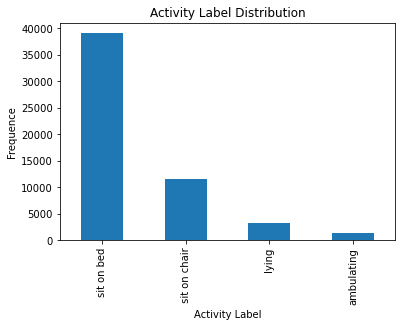

In [56]:
count_class = pd.value_counts(new_df3['Activity Label'], sort=True)
count_class.plot(kind=  'bar')
plt.title("Activity Label Distribution")
plt.xticks(range(4),LABELS)
plt.xlabel('Activity Label')
plt.ylabel('Frequence')
plt.show()

In [59]:
smk = SMOTETomek(random_state =42)
x_res_up , y_res_up = smk.fit_resample(x,y)

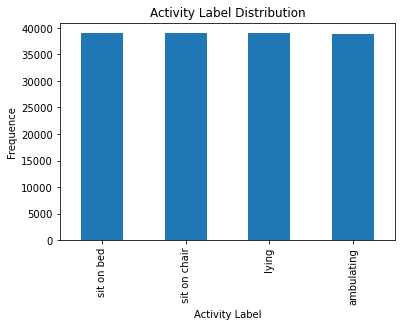

In [64]:
count_class = pd.value_counts(y_res_up, sort=True)
count_class.plot(kind=  'bar')
plt.title("Activity Label Distribution")
plt.xticks(range(4),LABELS)
plt.xlabel('Activity Label')
plt.ylabel('Frequence')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 17173 to 72487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            55315 non-null  float64
 1   Acc. Front      55315 non-null  float64
 2   Acc. vert       55315 non-null  float64
 3   Acc. Lat        55315 non-null  float64
 4   id              55315 non-null  int64  
 5   RSSI            55315 non-null  float64
 6   Phase           55315 non-null  float64
 7   Freq            55315 non-null  float64
 8   Activity Label  55315 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 4.2 MB
